<h1> Project 1: Integration of Mergesort & Insertion Sort</h1>

In Mergesort, when the sizes of subarrays are small, the overhead of many recursive calls makes the algorithm inefficient. Therefore, in real use, we often combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency. The idea is to set a small integer S as a threshold for the size of subarrays. Once the size of a subarray in a recursive call of Mergesort is less than or equal to S, the algorithm will switch to Insertion Sort, which is efficient for small-sized input.

<b> (a) Algorithm implementation: Implement the above hybrid algorithm. </b>

In [30]:
# Random S value.
S = 5

def insertion_sort(arr, left, right):
    comparisons = 0
    for i in range(left + 1, right + 1):
        key = arr[i]
        j = i - 1
        while j >= left:
            comparisons += 1
            if key < arr[j]:
                arr[j + 1] = arr[j]
                j -= 1
            else:
                break
        arr[j + 1] = key
    return comparisons


def merge(arr, left, middle, right):
    comparisons = 0
    n1 = middle - left + 1
    n2 = right - middle
    L = [0] * n1
    R = [0] * n2
    for i in range(n1):
        L[i] = arr[left + i]
    for j in range(n2):
        R[j] = arr[middle + 1 + j]
    i, j, k = 0, 0, left
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
        comparisons += 1
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1
    return comparisons

def hybrid_sort(arr, left, right, S):
    comparisons = 0
    if left < right:
        if (right-left+1) <= S:
            comparisons += insertion_sort(arr, left, right)
        else:
            middle = (left+(right))//2
            comparisons += hybrid_sort(arr, left, middle, S)
            comparisons += hybrid_sort(arr, middle+1, right, S)
            comparisons += merge(arr, left, middle, right)
    else: 
        return 0
    return comparisons

# Example usage
test_array = [12, 11, 13, 5, 6, 7, 1, 2] 
comparisons = hybrid_sort(test_array, 0, len(test_array)-1, S)
print(comparisons, test_array)

16 [1, 2, 5, 6, 7, 11, 12, 13]


<b> (b) Generate input data: Generate arrays of increasing sizes, in a range from 1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of [1, …, x], where x is the largest number you allow for your datasets. </b>

In [37]:
import random

random.seed(10)

def generate_random_array(size, max_val):
    return [random.randint(1, max_val) for _ in range(size)]

# Input Data
sizes = [1000, 10000, 100000, 1000000, 10000000]
#max_val = 10000000  # Example maximum value for the integers in the datasets
datasets = {size: generate_random_array(size, size) for size in sizes}

# Saving to file so no need to regenerate lists
with open('datasets_random.txt', 'w') as f:
    print(datasets, file=f)

In [38]:
# Checking if random.seed() is working
for key, value_list in datasets.items():
    print(f"First value for {key}: {value_list[0]}")

First value for 1000: 586
First value for 10000: 6668
First value for 100000: 1170
First value for 1000000: 375574
First value for 10000000: 2511704


First value for 1000: 586

First value for 10000: 6668

First value for 100000: 1170

First value for 1000000: 375574

First value for 10000000: 2511704

In [39]:
# Sorting list of length 1,000,000
comparisons_1M = hybrid_sort(datasets[1000000], 0, 1000000-1, S)
print("Key Comparisons:" + str(comparisons_1M))
with open('datasets_1M.txt', 'w') as f:
    print(datasets[1000000], file=f)

# Check if is sorted.
print(all(datasets[1000000][i] <= datasets[1000000][i+1] for i in range(len(datasets[1000000]) - 1)))

Key Comparisons:18727548
True


<b> (c) Analyze time complexity: Run your program of the hybrid algorithm on the datasets generated in Step (b). Record the number of key comparisons performed in each case. </b>

In [ ]:
# Opening saved list of random numbers.
import ast

with open('datasets_random.txt', 'r') as f:
    data_string = f.read()
    datasets = ast.literal_eval(data_string)

i. With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity.

In [42]:
# Random S value.
S = 500

comparisons_SFixed = {size: hybrid_sort(datasets[size], 0, size-1, S) for size in sizes}
print(comparisons_SFixed)
with open('comparisons_SFixed.txt', 'w') as f:
    print(comparisons_SFixed, file=f)

{1000: 1498, 10000: 34976, 100000: 499824, 1000000: 6498560, 10000000: 920367990}


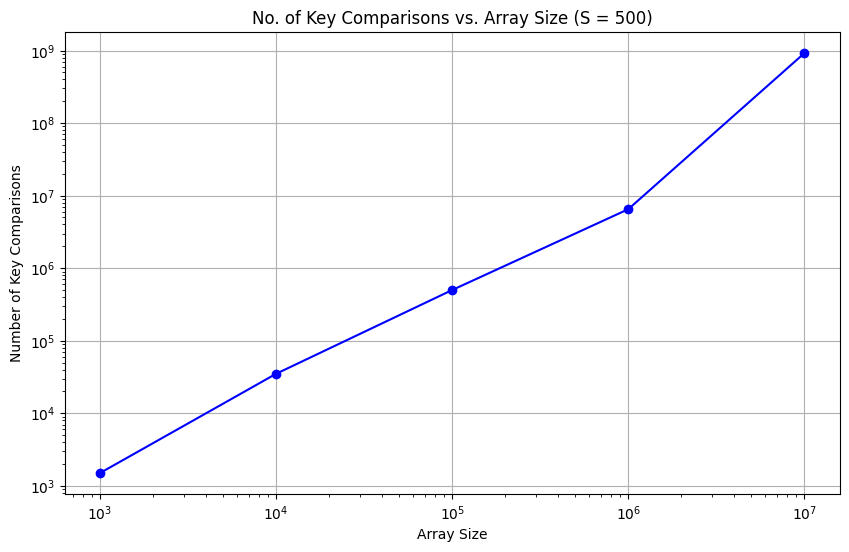

In [48]:
import matplotlib.pyplot as plt

x = sizes
y = [comparisons_SFixed[size] for size in sizes]

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.title('No. of Key Comparisons vs. Array Size (S = {})'.format(S))
plt.xlabel('Array Size')
plt.ylabel('Number of Key Comparisons')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

ii. With the input size n fixed, plot the number of key comparisons over different values of S. Compare your empirical results with your  theoretical analysis of the time complexity.

In [62]:
# Different Values of S
S_List = [1, 10, 100, 1000, 10000, 100000, 1000000]

S_List2 = [i for i in range(0,101)]

# Input size n = 1,000,000
comparisons_SList = {S: hybrid_sort(datasets[1000000], 0, 1000000-1, S) for S in S_List2}
print(comparisons_SList)
with open('comparisons_SList.txt', 'w') as f:
    print(comparisons_SList, file=f)

{0: 10066432, 1: 10066432, 2: 10066432, 3: 10017856, 4: 9804288, 5: 9804288, 6: 9804288, 7: 9658560, 8: 9411072, 9: 9411072, 10: 9411072, 11: 9411072, 12: 9411072, 13: 9411072, 14: 9411072, 15: 9071040, 16: 8952320, 17: 8952320, 18: 8952320, 19: 8952320, 20: 8952320, 21: 8952320, 22: 8952320, 23: 8952320, 24: 8952320, 25: 8952320, 26: 8952320, 27: 8952320, 28: 8952320, 29: 8952320, 30: 8731008, 31: 8476608, 32: 8476608, 33: 8476608, 34: 8476608, 35: 8476608, 36: 8476608, 37: 8476608, 38: 8476608, 39: 8476608, 40: 8476608, 41: 8476608, 42: 8476608, 43: 8476608, 44: 8476608, 45: 8476608, 46: 8476608, 47: 8476608, 48: 8476608, 49: 8476608, 50: 8476608, 51: 8476608, 52: 8476608, 53: 8476608, 54: 8476608, 55: 8476608, 56: 8476608, 57: 8476608, 58: 8476608, 59: 8476608, 60: 8476608, 61: 8002368, 62: 7985088, 63: 7985088, 64: 7985088, 65: 7985088, 66: 7985088, 67: 7985088, 68: 7985088, 69: 7985088, 70: 7985088, 71: 7985088, 72: 7985088, 73: 7985088, 74: 7985088, 75: 7985088, 76: 7985088, 77: 

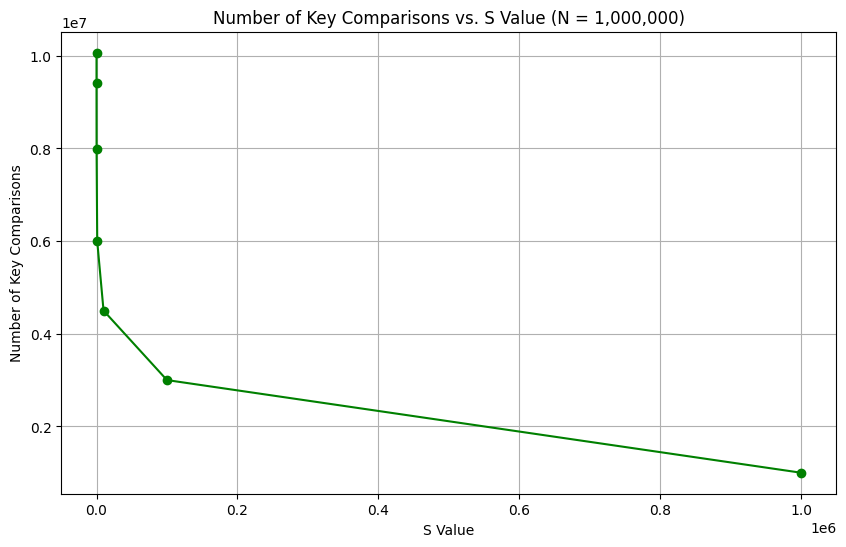

In [61]:
x = S_List
y = [comparisons_SList[S] for S in S_List]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='g')
plt.title('Number of Key Comparisons vs. S Value (N = 1,000,000)')
plt.xlabel('S Value')
plt.ylabel('Number of Key Comparisons')
#plt.xscale('log')
plt.grid(True)
plt.show()

iii. Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.

Option 1: Run Hybrid Sort algorithm with a several differently sized input array and adjust the S value for each array and plot the run time against it. But it may be very time consuming to do.

<b> Option 2 (Less Compute Intensive): The point of the S value is so that the sorting algorithm switches to Insertion Sort when it becomes faster than Merge Sort. By comparing the runtime     between Insertion Sort and Merge Sort, S value should be the intersection of their runtime curve. </b>

In order to sort an array with Merg Sort only and without reimplementing the original Merge Sort, we can set S = 0. This causes the Hybrid Sort alogrithm to never switch to Insertion Sort mode as all arrays that need to be sorted > 0 and go through the Merge Sort branch.

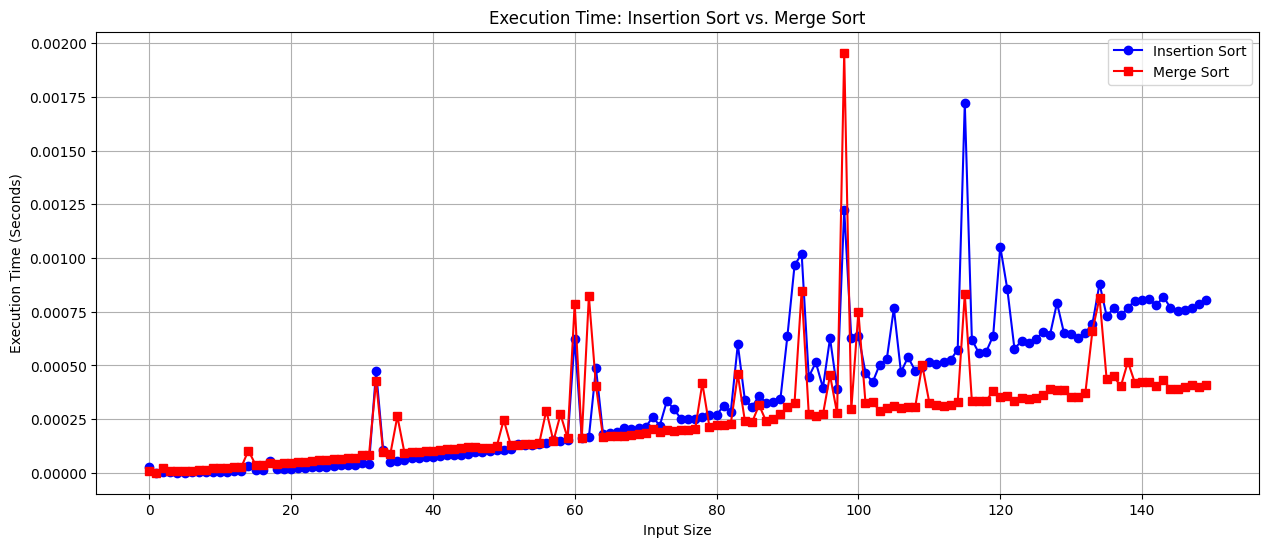

In [92]:
import time

sizes2 = [1 * i for i in range(150)]
insertion_sort_times = []
merge_sort_times = []


for size in sizes2:
    # Generate a random array of 'size' integers
    random.seed(10)
    arr2 = [random.randint(1, size) for _ in range(size)]
    
    # Insertion Sort
    arr2_insertion = arr2.copy()
    start_time = time.time()
    comparisons = insertion_sort(arr2_insertion, 0, size - 1)
    end_time = time.time()
    insertion_sort_times.append(end_time - start_time)
    
    # Merge Sort
    arr2_merge = arr2.copy()
    start_time = time.time()
    comparisons = hybrid_sort(arr2_merge, 0, size - 1, 0)
    end_time = time.time()
    merge_sort_times.append(end_time - start_time)

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(sizes2, insertion_sort_times, marker='o', linestyle='-', color='b', label='Insertion Sort')
plt.plot(sizes2, merge_sort_times, marker='s', linestyle='-', color='r', label='Merge Sort')
plt.title('Execution Time: Insertion Sort vs. Merge Sort')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (Seconds)')
plt.legend()
plt.grid(True)
plt.show()


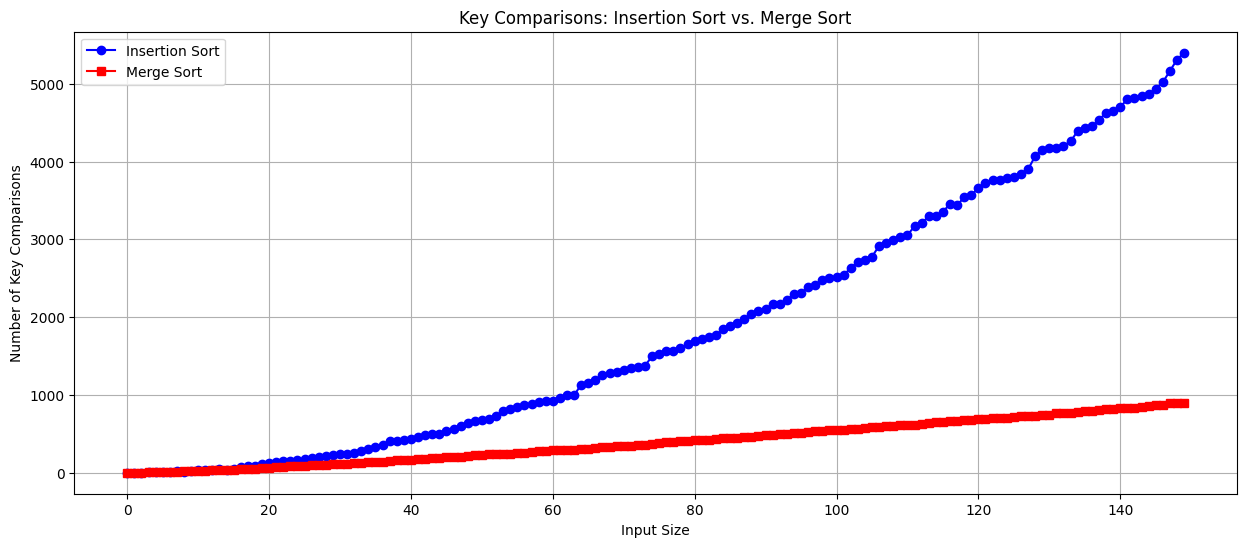

In [93]:
insertion_sort_comparisons = []
merge_sort_comparisons = []


for size in sizes2:
    # Generate a random array of 'size' integers
    random.seed(10)
    arr2 = [random.randint(1, size) for _ in range(size)]
    
    # Insertion Sort
    arr2_insertion = arr2.copy()
    comparisons = insertion_sort(arr2_insertion, 0, size - 1)
    insertion_sort_comparisons.append(comparisons)
    
    # Merge Sort
    arr2_merge = arr2.copy()
    comparisons = hybrid_sort(arr2_merge, 0, size - 1, 0)
    merge_sort_comparisons.append(comparisons)

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(sizes2, insertion_sort_comparisons, marker='o', linestyle='-', color='b', label='Insertion Sort')
plt.plot(sizes2, merge_sort_comparisons, marker='s', linestyle='-', color='r', label='Merge Sort')
plt.title('Key Comparisons: Insertion Sort vs. Merge Sort')
plt.xlabel('Input Size')
plt.ylabel('Number of Key Comparisons')
plt.legend()
plt.grid(True)
plt.show()


In [110]:
S_Optimal = 0
for i in range(len(sizes2) - 1):
    if merge_sort_comparisons[i] > insertion_sort_comparisons[i]:
        S_Optimal = i + 1

print("Merge    :", merge_sort_comparisons)
print("Insertion:", insertion_sort_comparisons)
print("Optimal S:", S_Optimal)

Merge    : [0, 0, 1, 3, 5, 8, 10, 14, 16, 18, 24, 28, 31, 33, 37, 40, 48, 50, 54, 61, 66, 70, 73, 81, 84, 91, 95, 94, 101, 108, 113, 112, 123, 130, 134, 138, 144, 149, 161, 167, 170, 172, 182, 187, 189, 198, 203, 207, 215, 222, 230, 235, 239, 240, 245, 253, 258, 267, 274, 281, 286, 287, 291, 295, 304, 311, 323, 329, 334, 340, 345, 349, 355, 356, 369, 387, 394, 398, 408, 412, 419, 422, 427, 431, 444, 447, 452, 458, 462, 472, 480, 481, 494, 500, 508, 516, 524, 531, 532, 547, 548, 551, 556, 566, 572, 585, 584, 596, 601, 610, 620, 619, 626, 643, 650, 656, 662, 670, 679, 683, 692, 695, 701, 699, 705, 718, 724, 725, 732, 740, 748, 765, 772, 774, 787, 788, 796, 804, 819, 817, 830, 837, 836, 849, 853, 866, 872, 891, 891, 901]
Insertion: [0, 0, 1, 3, 5, 6, 11, 16, 15, 22, 29, 30, 40, 42, 40, 53, 75, 82, 88, 114, 122, 133, 150, 152, 158, 171, 186, 207, 210, 227, 244, 245, 249, 278, 302, 336, 358, 404, 406, 424, 429, 456, 488, 500, 500, 531, 568, 603, 633, 661, 673, 685, 726, 790, 823, 839, 865, 

<b> (d) Compare with original Mergesort: Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. You can use the optimal value of S obtained in (c) for this task. </b>

In [114]:
def merge_sort(arr, l, r):
    comparisons = 0
    if l < r:
        m = (l + r) // 2
        # Sort left and right halves
        comparisons += merge_sort(arr, l, m)
        comparisons += merge_sort(arr, m + 1, r)
        comparisons += merge(arr, l, m, r)
    else:
        return 0
    return comparisons

start_time = time.time()
comparisons = merge_sort(datasets[10000000], 0, 10000000 - 1)
end_time = time.time()
merge_sort_time_10M = end_time - start_time
print("Key Comparisons (Merge Sort): ", comparisons)
print("Time Taken (Merge Sort): ", merge_sort_time_10M)

start_time = time.time()
comparisons = hybrid_sort(datasets[10000000], 0, 10000000 - 1, S_Optimal)
end_time = time.time()
hybrid_sort_time_10M = end_time - start_time
print("Key Comparisons (Hybrid Sort): ", comparisons)
print("Time Taken (Hybrid Sort): ", hybrid_sort_time_10M)


Key Comparisons (Merge Sort):  118788160
Time Taken (Merge Sort):  93.93009090423584
Key Comparisons (Hybrid Sort):  111525184
Time Taken (Hybrid Sort):  67.22918772697449


Key Comparisons (Merge Sort):  118788160

Time Taken (Merge Sort):  93.93009090423584

Key Comparisons (Hybrid Sort):  111525184

Time Taken (Hybrid Sort):  67.22918772697449